# Coral reef from heightmap

In [1]:
# %matplotlib notebook
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import random 
random.seed(1)

import matplotlib.pyplot as plt
import glob

from coralize_my_island import *
from heightmap_from_skeleton import *

In [2]:
plt.rcParams["figure.figsize"] = [25, 15]
# plt.rcParams["figure.dpi"] = 100

colorsSpaces = [[80, 50, 20], [100, 100, 20], [255, 122, 87], [255, 122, 87], [255, 242, 0], [100, 230, 29]]
# Creating island colormap
waterLevel = 0.8
minCoral = 0.6
maxCoral = 0.7

limits = [0.0, minCoral * .9, minCoral, maxCoral, waterLevel, 1.0]
N = 5000
cummul = 0

colors = np.ones((N, 4))

for i in range(len(limits) - 1):
    nbElems = int((limits[i + 1] - limits[i]) * N)
    colors[cummul:(cummul+nbElems), 0] = np.linspace(colorsSpaces[i][0]/255, colorsSpaces[i+1][0]/255, nbElems)
    colors[cummul:(cummul+nbElems), 1] = np.linspace(colorsSpaces[i][1]/255, colorsSpaces[i+1][1]/255, nbElems)
    colors[cummul:(cummul+nbElems), 2] = np.linspace(colorsSpaces[i][2]/255, colorsSpaces[i+1][2]/255, nbElems)
    cummul += nbElems

cmap = matplotlib.colors.ListedColormap(colors)

41 images found


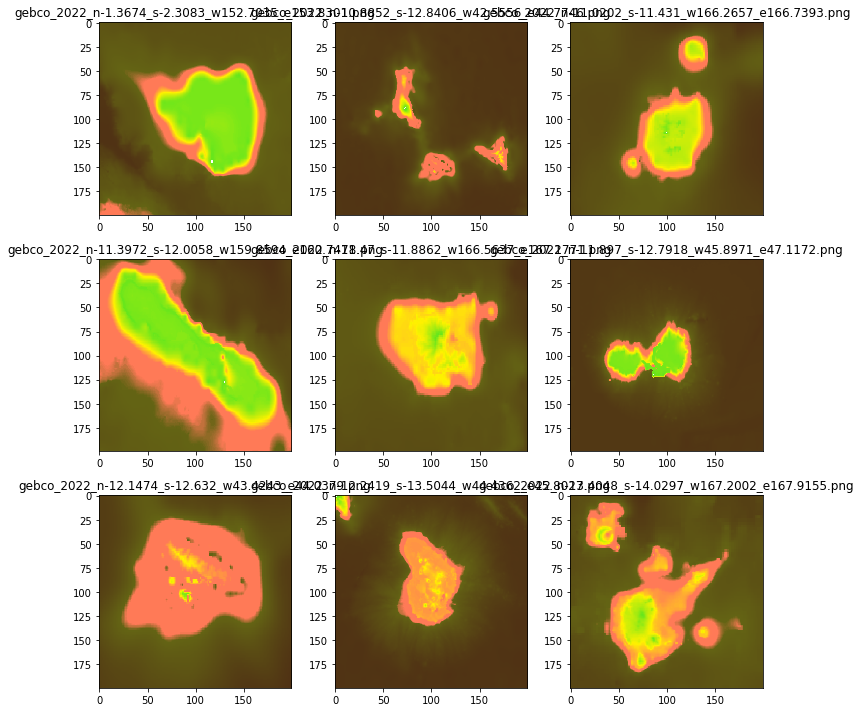

In [3]:
heightmap_folder = "random_heightmaps/"

imgs = glob.glob(heightmap_folder + "*.png")
print(f"{len(imgs)} images found")
fig, axes = plt.subplots(3, 3, figsize = (10, 10))
for i in range(min(9, len(imgs))):
    axes[i//3, i%3].imshow(normalizeImage(readImage(imgs[i], (200, 200))), cmap=cmap)
    axes[i//3, i%3].set_title(os.path.split(imgs[i])[-1])
plt.tight_layout()

Choose an island:

In [4]:
island_file = ""
heightmap = []
subsidence = 1.0
island = []

@interact 
def choose_heightmap(filename = imgs, subsidence_value = (0.0, 1.0, 0.01)):
    %matplotlib inline
    global heightmap
    global island_file
    global subsidence
    global island
    subsidence = subsidence_value
    island_file = filename
    heightmap = normalizeImage(readImage(island_file, (200, 200)))
    island = method1Create(heightmap, subsidence_value)
    
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121)
    plt.rcParams["image.aspect"] = "auto"
    ax1.imshow(island, vmin = 0.0, vmax = 1.0, cmap = cmap)
    ax2 = fig.add_subplot(122, projection="3d")
    plot3D(island, ax2, cmap)
    plt.show()
    %matplotlib notebook

interactive(children=(Dropdown(description='filename', options=('random_heightmaps\\gebco_2022_n-1.3674_s-2.30…

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<IPython.core.display.Javascript object>


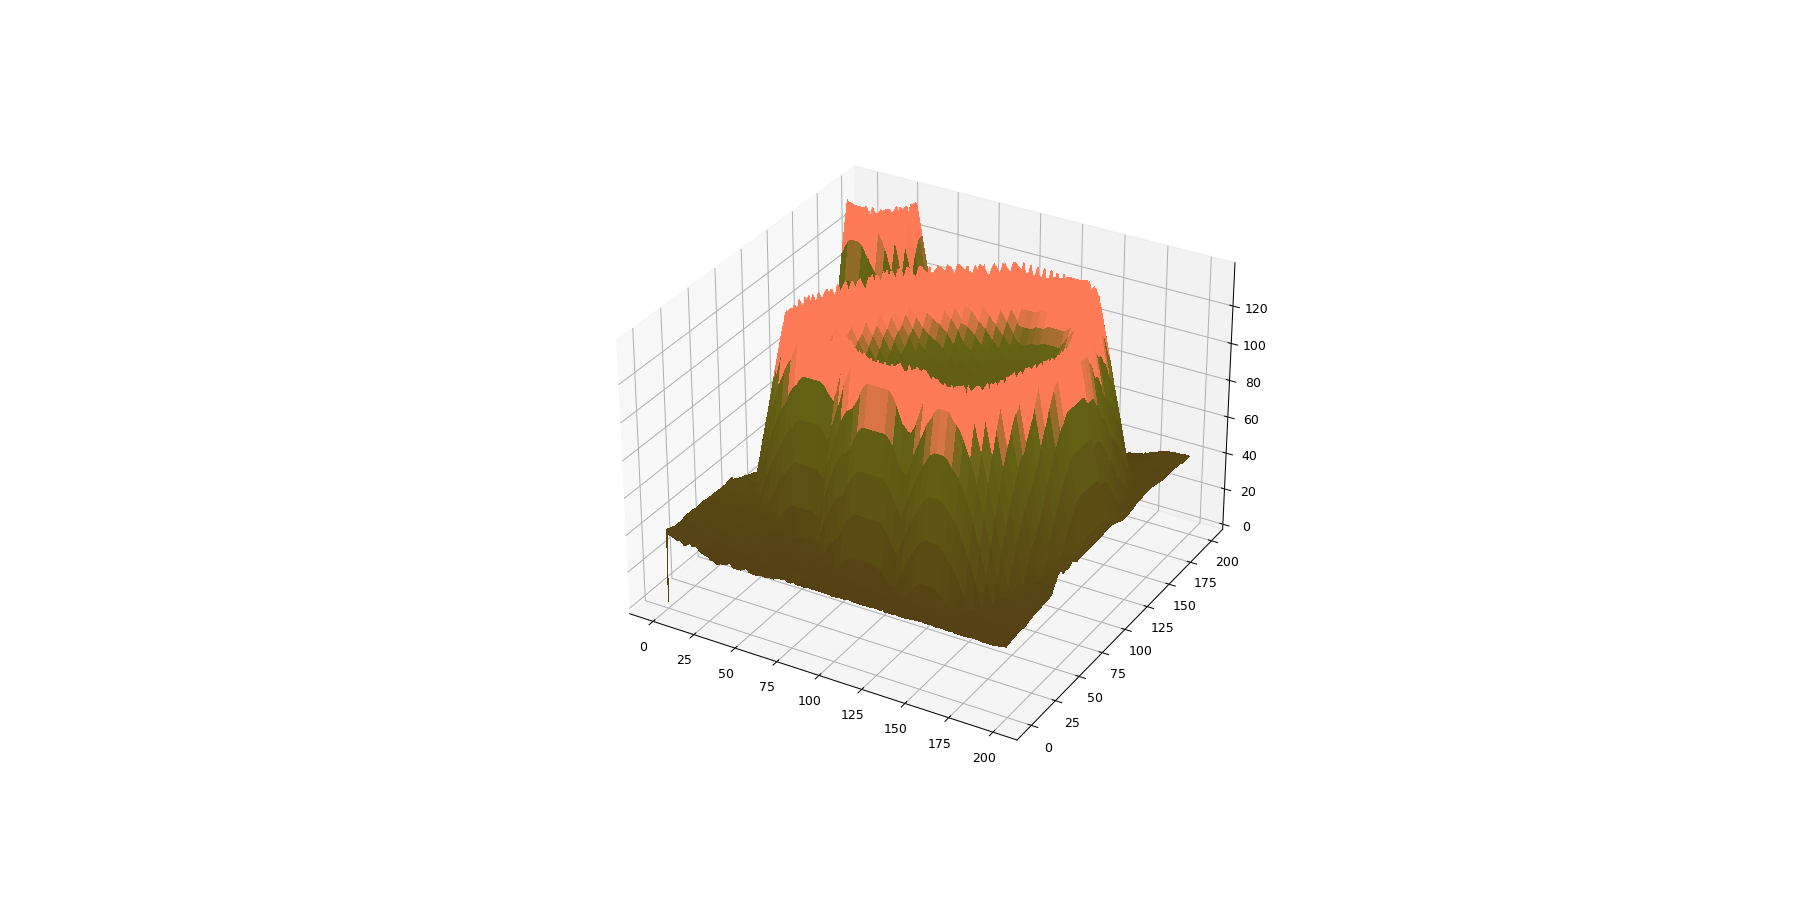

In [5]:
@interact_manual
def displayInteractive():
    %matplotlib notebook

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, projection="3d")

    plot3D(island, ax, cmap)
displayInteractive()